x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1924 - loss: 2.1446 - val_accuracy: 0.3616 - val_loss: 1.7337
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3764 - loss: 1.6817 - val_accuracy: 0.4024 - val_loss: 1.6154
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4086 - loss: 1.6017 - val_accuracy: 0.4252 - val_loss: 1.5577
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4230 - loss: 1.5764 - val_accuracy: 0.4326 - val_loss: 1.5549
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4360 - loss: 1.5416 - val_accuracy: 0.4422 - val_loss: 1.5190
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2577 - loss: 1.9653 - val_accuracy: 0.4470 - val_loss: 1.4962
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4517 - loss: 1.5010 - val_accuracy: 0.5331 - val_loss: 1.2823
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5182 - loss: 1.3440 - val_accuracy: 0.5740 - 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2678 - loss: 2.0176 - val_accuracy: 0.3507 - val_loss: 1.7901
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3831 - loss: 1.7084 - val_accuracy: 0.4276 - val_loss: 1.6162
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4230 - loss: 1.6017 - val_accuracy: 0.4372 - val_loss: 1.5713
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4539 - loss: 1.5353 - val_accuracy: 0.4560 - val_loss: 1.5159
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4635 - loss: 1.4951 - val_accuracy: 0.4630 - val_loss: 1.5069


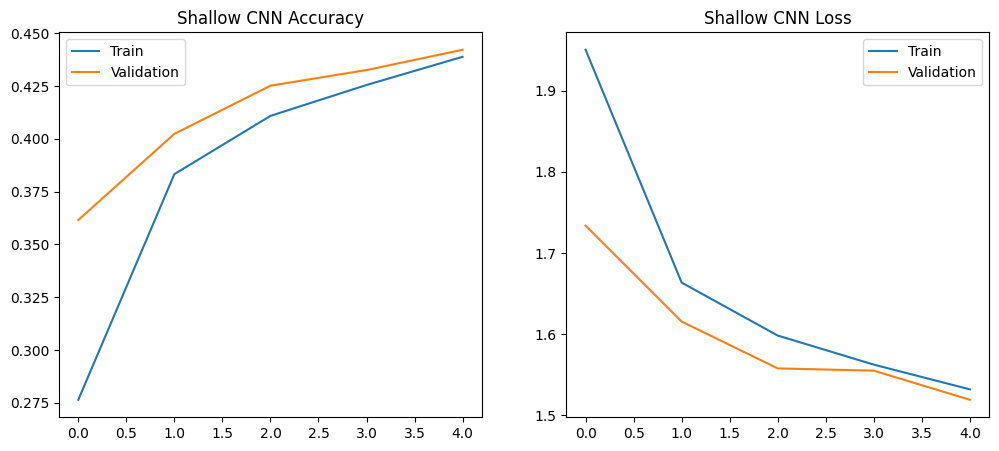

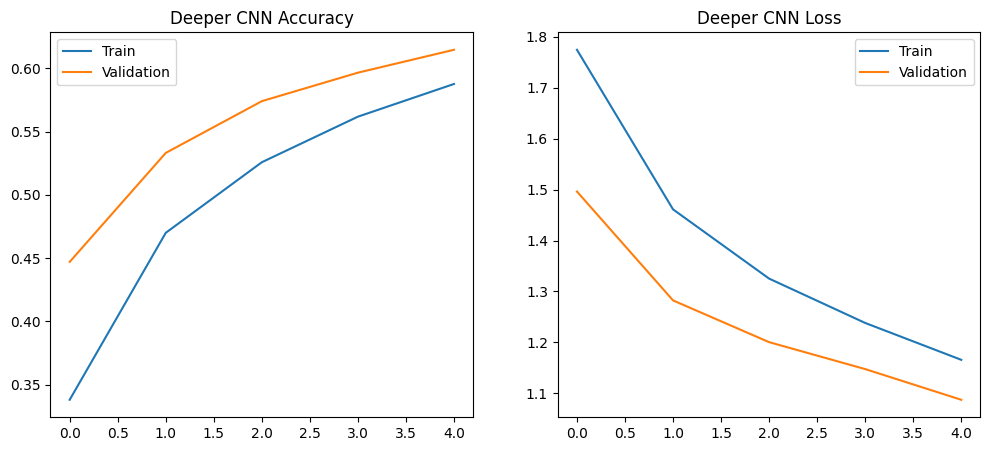

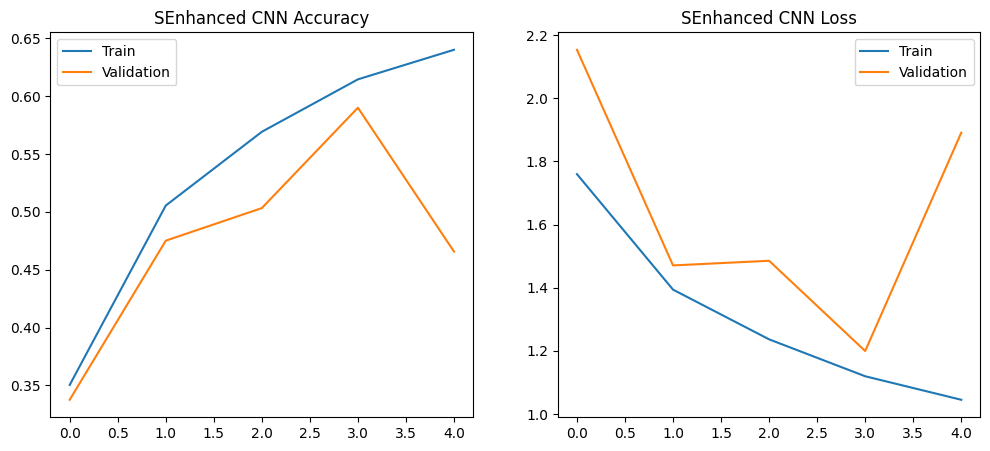

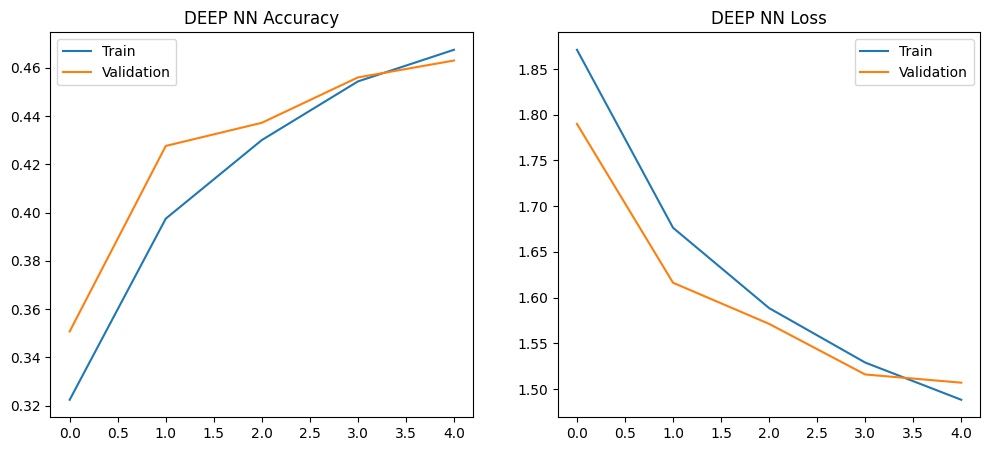

Model-1 Params: 1766
Model-2 Params: 57770
Model-3 Params: 243594
DNN Params: 1738890


In [2]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 2 Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test  = x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


#  CNN Model-1: Shallow CNN

def build_model_1():
    model = models.Sequential([
        layers.Conv2D(8, (3,3), strides=1, padding='valid', activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2), strides=2),
        layers.Conv2D(4, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2), strides=2),
        layers.Flatten(),
        layers.Dense(8, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


#  CNN Model-2: Deeper CNN

def build_model_2():
    model = models.Sequential([
        layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model


#  CNN Model-3: Enhanced CNN

def build_model_3():
    model = models.Sequential([
        layers.Conv2D(32, (5,5), strides=1, input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model


# 6️⃣ DNN Model: No Convolution

def build_dnn():
    model = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


# 7️⃣ Training Setup

EPOCHS = 5
BATCH_SIZE = 64
LEARNING_RATE = 0.001

def compile_and_train(model):
    optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE
    )
    return history


#  Train All Models

model1 = build_model_1()
history1 = compile_and_train(model1)

model2 = build_model_2()
history2 = compile_and_train(model2)

model3 = build_model_3()
history3 = compile_and_train(model3)

dnn_model = build_dnn()
history_dnn = compile_and_train(dnn_model)

# 9️⃣ Plot Accuracy and Loss

def plot_history(history, title):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.legend(['Train','Validation'])

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.legend(['Train','Validation'])

    plt.show()

# Example: Plot model1 history
plot_history(history1, "Shallow CNN")
plot_history(history2, "Deeper CNN")
plot_history(history3, "SEnhanced CNN")
plot_history(history_dnn, "DEEP NN")


#  Parameter Count

print("Model-1 Params:", model1.count_params())
print("Model-2 Params:", model2.count_params())
print("Model-3 Params:", model3.count_params())
print("DNN Params:", dnn_model.count_params())